In [1]:
using Plots
using JLD2

In [2]:
data_mwms = load("data/qubit_surface_mwms_5_15_0.105_0.115_1000_1_1001744.jld2")
Krange = 1 : length(collect(values(data_mwms["p_list"]))[1])
drange = data_mwms["drange"]
ϵrange = data_mwms["ϵrange"]
p_mwms_list = data_mwms["p_list"]

data_bsv = load("data/qubit_surface_bsv_3_15_0.105_0.115_1000032.jld2")
p_bsv_list = data_bsv["p_list"] ;

data_mwms_weight_time = load("data/qubit_surface_mwms_weights_times_5_15_0.114_1000_1_2000.jld2") 
ϵ_weight = collect(keys(data_mwms_weight_time["w_mwhms_list"]))[1][1]
println(ϵ_weight)
linewidth=2

0.114


2

# Fig a

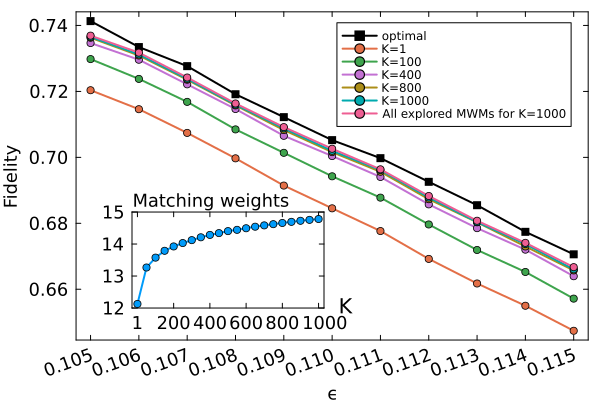

In [3]:
d = 11

f_bsv = [p_bsv_list[[ϵ, d]] for ϵ in ϵrange]
plot(ϵrange, f_bsv.^2, marker=:square, label="optimal", color=:black, linewidth=linewidth)

for k in [1, 100, 400, 800, 1000, 1001]
    f_mwms = [p_mwms_list[[ϵ, d]][k] for ϵ in ϵrange]
    if k == 1001
        label="All explored MWMs for K=1000"
    else
        label="K=$k"
    end
    plot!(ϵrange, f_mwms.^2, marker=:circle, label=label, linewidth=linewidth)
end

plot!(xlabel="ϵ", 
    ylabel="Fidelity", 
    xticks=round.(ϵrange, digits=3),
    grid=false,
    tickfontsize=12,
    labelfontsize=12,
    xrotation = 20,
    frame=:box
    # yaxis=:log
)


plot!( 
    subplot = 2,
    inset = bbox(0.22, 0.53, 0.32, 0.24, :top, :left),
)

xticks = [1, collect(50:50:1000)...]
for dd in [d]
    weights = data_mwms_weight_time["w_mwhms_list"][[ϵ_weight, dd]]
    plot!(weights[xticks], marker=:circle, subplot=2, linewidth=linewidth)
end


plot!(
    subplot=2,
    grid=false,
    tickfontsize=12,
    legend=false,
    xticks = (1:4:length(xticks), [string.(xticks[1:4:end-1])..., "  1000"]),
    ylim = [12, 15],
    frame=:box
)
annotate!(0.1103, 0.655, "K")
annotate!(0.1075, 0.687, text("Matching weights", 12))


In [4]:
savefig("plots/fig_qubit_surf_a.pdf");

In [5]:
f_bsv = [p_bsv_list[[ϵ, d]] for ϵ in ϵrange]
k = 1001
f_mwms = [p_mwms_list[[ϵ, d]][k] for ϵ in ϵrange]

abs.(f_bsv.^2 - f_mwms.^2) ./ f_bsv.^2

11-element Vector{Float64}:
 0.005955224266190874
 0.002307034826935106
 0.0047464749573317595
 0.003903918961026468
 0.004243910881723098
 0.003714140288607123
 0.004839419752897136
 0.006205668890476462
 0.006878607344945716
 0.004935302247049618
 0.005808616926990508

# Fig b

400 [84.94980984642555, 71.34044028474975, 48.61585597740387, 22.761814351084894]
300 [83.79783133298847, 67.54626864618153, 43.709844107072534, 19.920489078428936]
200 [78.62109520005606, 59.69241491642639, 35.59896874766967, 13.873050761122688]
100 [71.39994551263507, 42.048519551825954, 21.169115994806987, 7.803371482055119]


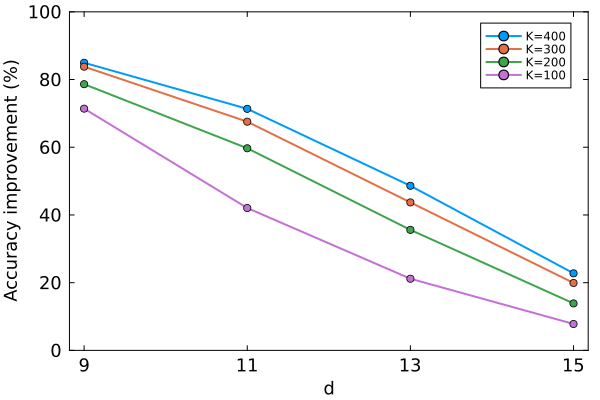

In [6]:
ϵ = ϵrange[end]
drange = data_mwms["drange"]
drange = drange[3:end] # exclude d = 5 and 7

plot()
Krange = [400, 300, 200, 100]
improvements = nothing
for K in Krange
    improvements = []
    for d in drange
        f_bsv = [p_bsv_list[[ϵ, d]] for ϵ in ϵrange]
        f_mwms_1 = [p_mwms_list[[ϵ, d]][1] for ϵ in ϵrange]
        f_mwms = [p_mwms_list[[ϵ, d]][K] for ϵ in ϵrange]
        push!(improvements, (f_mwms.^2 - f_mwms_1.^2) ./ abs.(f_bsv.^2 - f_mwms_1.^2))
    end

    println(K, " ", [item[end] for item in improvements] .* 100)
    plot!(drange, [item[end] for item in improvements] .* 100, marker=:circle, label="K=$K", linewidth=linewidth)
end

plot!(xlabel="d", 
    ylabel="Accuracy improvement (%)", 
    xticks=drange,
    grid=false,
    tickfontsize=12,
    labelfontsize=12,
    # yaxis=:log
    ylim = [0, 100],
    frame=:box
)

In [7]:
savefig("plots/fig_qubit_surf_b.pdf");